In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib 

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
a = np.load('allSignal.npy')

In [3]:
e = np.load('allError.npy')

In [4]:
p = np.load('allInputs.npy',allow_pickle=True)

In [5]:
parameters = []
for setOfParams in p:
    parameters.append(setOfParams[0]['maff']['diameterParams'][0])
parameters = np.array(parameters)

In [6]:
goodIdx = np.argsort(e.flatten())

In [7]:
time = np.linspace(-.5,.5,49997)*1e3

In [9]:
from vagusNerve.nerveSetup import gammaDist
from vagusNerve.nerveSetup import loadDiameterDistribution
from vagusNerve.utils import getDiameters
import quantities as pq
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [10]:
d = getDiameters()

In [11]:
d = d / pq.m # Removes units for compatibility reasons

binSizeSamples = np.diff(d)[0]

empiricalDiams, empiricalProbs = loadDiameterDistribution('maff')

binSizeData = np.diff(empiricalDiams)[0] # Taking the first element ignores sloppy digitization towards the far end

binRatio = binSizeSamples/binSizeData

interp = interp1d(empiricalDiams,empiricalProbs,bounds_error=False,fill_value='extrapolate')

interpD = interp(d)

interpD[np.where(interpD<0)]=0


paramsMaff = curve_fit(gammaDist,d*1e6,interpD*10,p0=[9,0.5],bounds=(0,np.inf))

In [17]:
paramsMaff.shape

AttributeError: 'tuple' object has no attribute 'shape'

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\tharayil\AppData\Local\Temp\ipykernel_7156\761544664.py:16: SyntaxWarning: invalid escape sequence '\m'
  ax0.set_xlabel('Diameter ($\mu$m)')


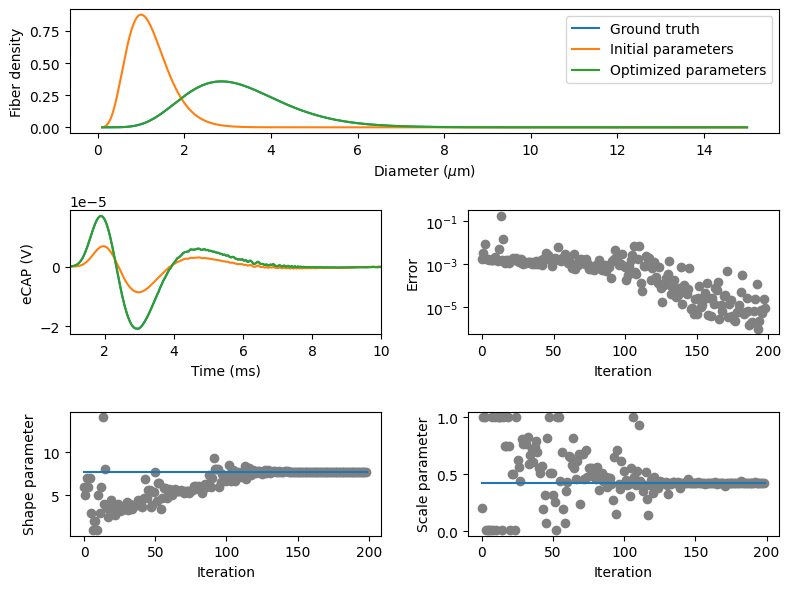

In [21]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(8,6))

gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])  # 3 rows, 2 columns

ax0 = fig.add_subplot(gs[0, :])

ax0.plot(d*1e6,gammaDist(d*1e6,paramsMaff[0][0],paramsMaff[0][1]))
ax0.plot(d*1e6,gammaDist(d*1e6,parameters[0][0],parameters[0][1]))
ax0.plot(d*1e6,gammaDist(d*1e6,parameters[goodIdx[0]][0],parameters[goodIdx[1]][1]))

plt.legend(['Ground truth','Initial parameters','Optimized parameters'])

ax0.set_xlabel('Diameter ($\mu$m)')
ax0.set_ylabel('Fiber density')

ax1 = fig.add_subplot(gs[1, 0])

groundTruth = np.load('../optimizeFractions_sweep/groundTruth/Signals_Stim_500.npy')
original = a[0]
optimal = a[goodIdx[0]]

ax1.plot(time,groundTruth[0,0])
ax1.plot(time,original[0,0])
ax1.plot(time,optimal[0,0])


ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('eCAP (V)')

ax1.set_xlim([1,10])

plt.tight_layout()

ax2 = fig.add_subplot(gs[1, 1])

ax2.semilogy(np.arange(len(e)),e,'o',color='grey')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Error')

ax3 = fig.add_subplot(gs[2, 0])

ax3.plot(parameters[:,0],'o',color='grey')
ax3.plot(np.array([0,len(parameters)]),[7.72,7.72])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Shape parameter')

ax4 =fig.add_subplot(gs[2, 1])

ax4.plot(parameters[:,1],'o',color='grey')
ax4.plot(np.array([0,len(parameters)]),[0.425,0.425])
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Scale parameter')

plt.tight_layout()

plt.savefig('Optimization.png',dpi=600)